# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv


Bad key "text.kerning_factor" on line 4 in
C:\Anaconda\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)
map_box_api

'pk.eyJ1IjoiZHNwcmluZzA3IiwiYSI6ImNrb2I3Y3ZjMzA3a3gydWxobzNmMnllemwifQ.SmQ3h7Qa8A4CHBBRXV3RsA'

# Import Data

In [3]:
# Import the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                  
2010      Alamo Square           291.182945         372560        1239
2010        Anza Vista           267.932583         372560        1239
2010           Bayview           170.098665         372560        1239
2010  Buena Vista Park           347.394919         372560        1239
2010  Central Richmond           319.027623         372560        1239

In [4]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
neighborhood_coords = pd.read_csv(file_path)
neighborhood_coords.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [96]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    mean_housing_units = sfo_data.groupby('year')['housing_units'].mean()

    
# Use the Pandas plot function to plot the average housing units per year.
    
    avg_housing_units_yr_plot = mean_housing_units.plot.bar()
    avg_housing_units_yr_plot.set_xlabel('year')
    avg_housing_units_yr_plot.set_ylabel('Mean_Housing_Units')
    avg_housing_units_yr_plot.set_title('Average Housing Units per Year')
    avg_housing_units_yr_plot.plot(); plt.ylim((370000,385000))

    return avg_housing_units_yr_plot

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    mean_sale_rent = sfo_data.groupby('year')['sale_price_sqr_foot', 'gross_rent'].mean()
    
    mean_gr_line = mean_sale_rent.plot.line(y='gross_rent', color='blue', title='Average Gross Rent Per Year')
    mean_gr_line.set_xlabel('Year')
    mean_gr_line.set_ylabel('Gross Rent')
    
    return mean_gr_line

def average_sales_price():
    """Average Sales Price Per Year."""
    
    mean_sale_rent = sfo_data.groupby('year')['sale_price_sqr_foot', 'gross_rent'].mean()
    
    mean_ppsf_line = mean_sale_rent.plot.line(y='sale_price_sqr_foot', color='red', title='Average Price per Square Foot per Year')
    mean_ppsf_line.set_xlabel('Year')
    mean_ppsf_line.set_ylabel('Price per Square Foot')
    
    return mean_ppsf_line


def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    average_prices = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    average_prices.reset_index(inplace=True)
    
    average_prices_plot = average_prices.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel="Year",
    ylabel="Average Price per Square Foot",
    title="Average Price per Sqr Foot Per Year by Neighborhood",
    groupby="neighborhood",
    height=400)
    
    return average_prices_plot


def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""

    mean_sppsf_neighborhood = sfo_data.groupby("neighborhood").mean().sort_values(by="sale_price_sqr_foot", ascending=False)
    mean_sppsf_neighborhood.reset_index(inplace=True)

    top_10_sppsf_neighborhood = mean_sppsf_neighborhood.head(10)
    
    top_10_most_expensive_neighborhood_plot = top_10_sppsf_neighborhood.hvplot.bar(
    "neighborhood",
    "sale_price_sqr_foot",
    xlabel="Neighborhood",
    ylabel="Average Sale Price per Sqyare Foot",
    title="Top 10 Most Expensive Neighborhoods",
    rot=90,
    height=500)
    
    return  top_10_most_expensive_neighborhood_plot


def most_expensive_neighborhoods_rent_sales():
    """Comparison of Rent and Sales Prices of Most Expensive Neighborhoods."""   
    
    # calculate average prices ot go into plot
    average_prices = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    average_prices.reset_index(inplace=True)
    
    most_expensive_rent_sales_neighborhood_plot = average_prices.hvplot.bar(
    "year",
    ["sale_price_sqr_foot","gross_rent"],
    groupby="neighborhood",
    height=500,
    rot=90)
    
    return  most_expensive_rent_sales_neighborhood_plot
    
    
def parallel_coordinates():
    """Parallel Coordinates Plot."""

    # calculate the top 10 neighbords
    mean_sppsf_neighborhood = sfo_data.groupby("neighborhood").mean().sort_values(by="sale_price_sqr_foot", ascending=False)
    mean_sppsf_neighborhood.reset_index(inplace=True)
    top_10_sppsf_neighborhood = mean_sppsf_neighborhood.head(10)
    

    parallel_coordinates_plot = px.parallel_coordinates(
    top_10_sppsf_neighborhood,
    color_continuous_scale=px.colors.sequential.Inferno,
    color='sale_price_sqr_foot',
    title='Parallel Coordinate Analysis of 10 Most Expensive Neighborhoods in San Francisco'
    )

    return parallel_coordinates_plot

def parallel_categories():
    """Parallel Categories Plot."""
    
    # calculate the top 10 neighbords
    mean_sppsf_neighborhood = sfo_data.groupby("neighborhood").mean().sort_values(by="sale_price_sqr_foot", ascending=False)
    mean_sppsf_neighborhood.reset_index(inplace=True)
    top_10_sppsf_neighborhood = mean_sppsf_neighborhood.head(10)
    
    parallel_categories_plot = px.parallel_categories(
    top_10_sppsf_neighborhood,
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    title="Parallel Categories Analysis of Most Expensive San Francisco Neighborhoods"
    )

    return parallel_categories_plot


def neighborhood_map():
    """Neighborhood Map."""
    px.set_mapbox_access_token(map_box_api)
# Calculate the mean values for each neighborhood and rename neighborhood to Neighborhood to merge correctly with coords
    mean_values_neighborhood = sfo_data.groupby('neighborhood').mean()
    mean_values_neighborhood.reset_index(inplace=True)
    mean_values_neighborhood.rename(columns = {"neighborhood": "Neighborhood"}, inplace = True)
    
# Merging the average values (mean_values_neighborhood) with the neighborhood locations (neighborhood_coords) based on neighborhoods
    merged_data = pd.merge(mean_values_neighborhood, 
    neighborhood_coords,
    how='inner',
    on='Neighborhood')

    neighborhood_fig = px.scatter_mapbox(merged_data,
    lat='Lat',
    lon='Lon',
    hover_name='Neighborhood',
    color='gross_rent',
    size='sale_price_sqr_foot',
    title='Average Sale Price per Sqr Foot and Gross Rent in San Francisco Neighborhoods',
     zoom=10)
    
    
    return neighborhood_fig 

def sunburst():
    """Sunburst Plot."""
    
    average_prices = sfo_data.groupby([sfo_data.index, "neighborhood"]).mean()
    average_prices.reset_index(inplace=True)
    
    mean_sppsf_neighborhood = sfo_data.groupby("neighborhood").mean().sort_values(by="sale_price_sqr_foot", ascending=False)
    mean_sppsf_neighborhood.reset_index(inplace=True)
    top_10_sppsf_neighborhood = mean_sppsf_neighborhood.head(10)
    
    expensive_10_neighborhoods_per_year = average_prices[average_prices["neighborhood"].isin(top_10_sppsf_neighborhood["neighborhood"])]
    
    expensive_10_neigh_sunburst_plot = px.sunburst(
    expensive_10_neighborhoods_per_year,
    path=["year", "neighborhood"],
    values='sale_price_sqr_foot',
    color='gross_rent', 
    color_continuous_scale='Blues',
    title="Most Expensive San Francisco Neighborhoods: 2010-2016",
    height=500
)

    return expensive_10_neigh_sunburst_plot


## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

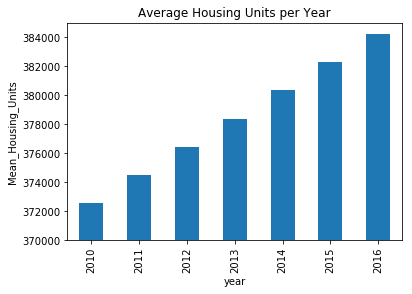

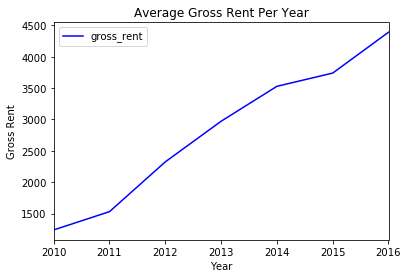

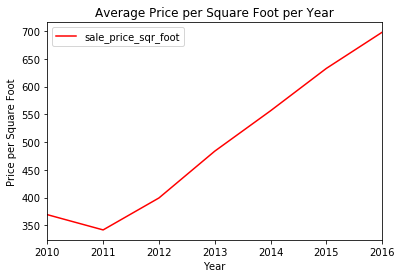

In [97]:
# Create a Title for the Dashboard
sanfran_property_dashboard = pn.pane.Markdown("#San Francisco Neighborhoods Property Analysis: 2010-2016")

# Create a tab layout for the dashboard

san_fran_property_tabs = pn.Tabs(

# Put groupby year plots in a single row
("Property Analysis per Year", pn.Row(housing_units_per_year(), average_gross_rent(), average_sales_price())),

# Put groupby neighborhood plots in a column
("Property Analysis By Neighborhood", pn.Column(average_price_by_neighborhood(), top_most_expensive_neighborhoods(), most_expensive_neighborhoods_rent_sales())),

# Put neighborhood map in a single row/column
("San Francisco Neighborhoods", pn.Column(neighborhood_map())),
    
#Put parallel categories and parallel coordinates in one row
("Property Parallel Analysis", pn.Row(parallel_categories(), parallel_coordinates())),

)

# Create the dashboard
san_fran_dashboard = pn.Column(pn.Row(sanfran_property_dashboard), san_fran_property_tabs, width=1000)

## Serve the Panel Dashboard

In [98]:
# Serve the# dashboard
san_fran_dashboard.servable()

Column(width=1000)
    [0] Row
        [0] Markdown(str)
    [1] Tabs
        [0] Row
            [0] Str(AxesSubplot)
            [1] Str(AxesSubplot)
            [2] Str(AxesSubplot)
        [1] Column
            [0] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
            [1] HoloViews(Bars)
            [2] Row
                [0] HoloViews(DynamicMap)
                [1] Column
                    [0] WidgetBox
                        [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                    [1] VSpacer()
        [2] Column
            [0] Plotly(Figure)
        [3] Row
            [0] Plotly(Figure)
            [1] Plotly(Figure)

# Debugging

Note: Some of the Plotly express plots may not render in the notebook through the panel functions.

However, you can test each plot by uncommenting the following code

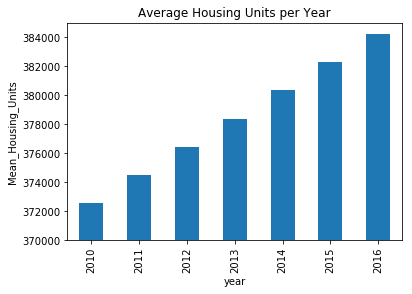

In [19]:
housing_units_per_year()

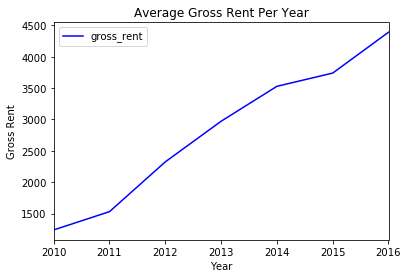

In [17]:
 average_gross_rent()

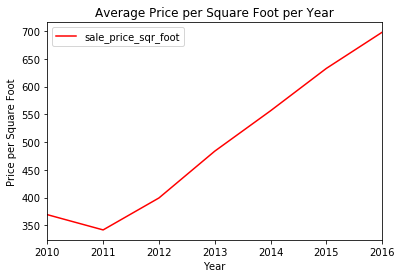

In [20]:
average_sales_price()

In [27]:
average_price_by_neighborhood()

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [31]:
top_most_expensive_neighborhoods()

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [36]:
most_expensive_neighborhoods_rent_sales()

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

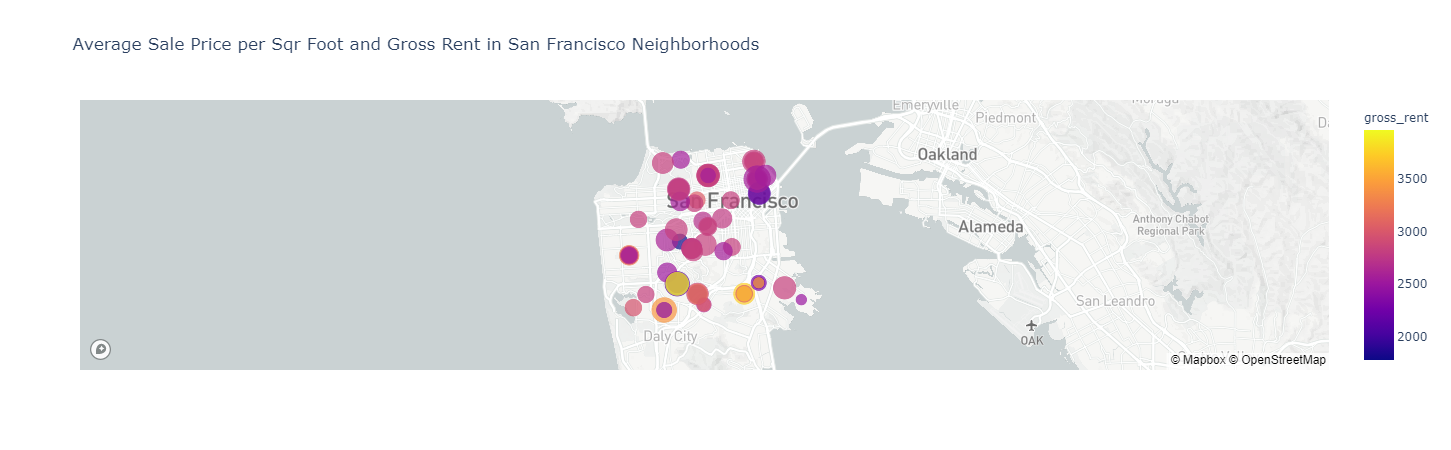

In [67]:
neighborhood_map().show()

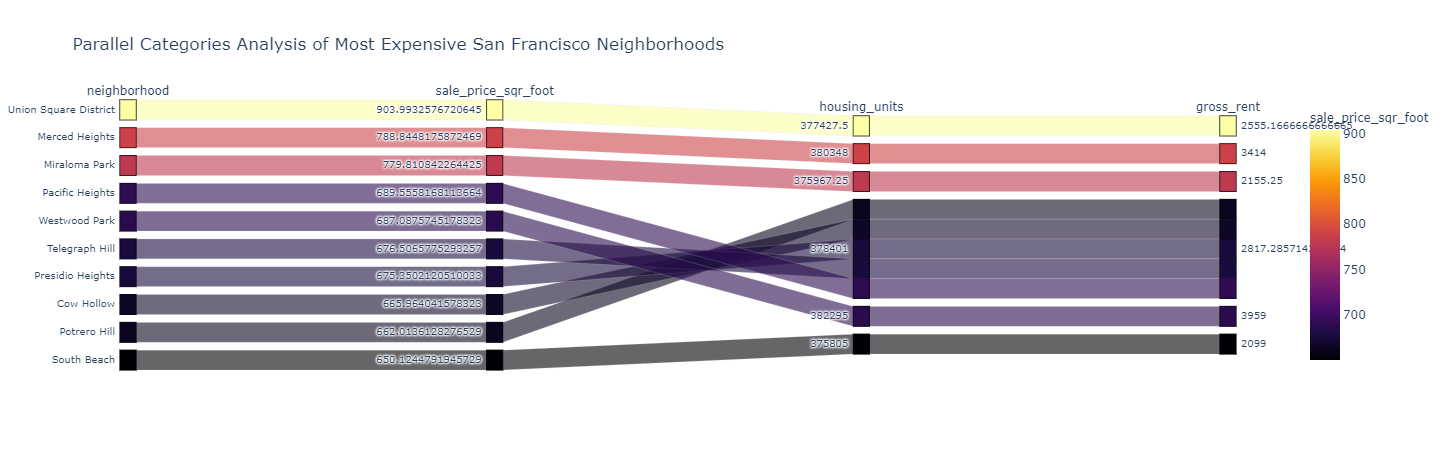

In [46]:
parallel_categories()

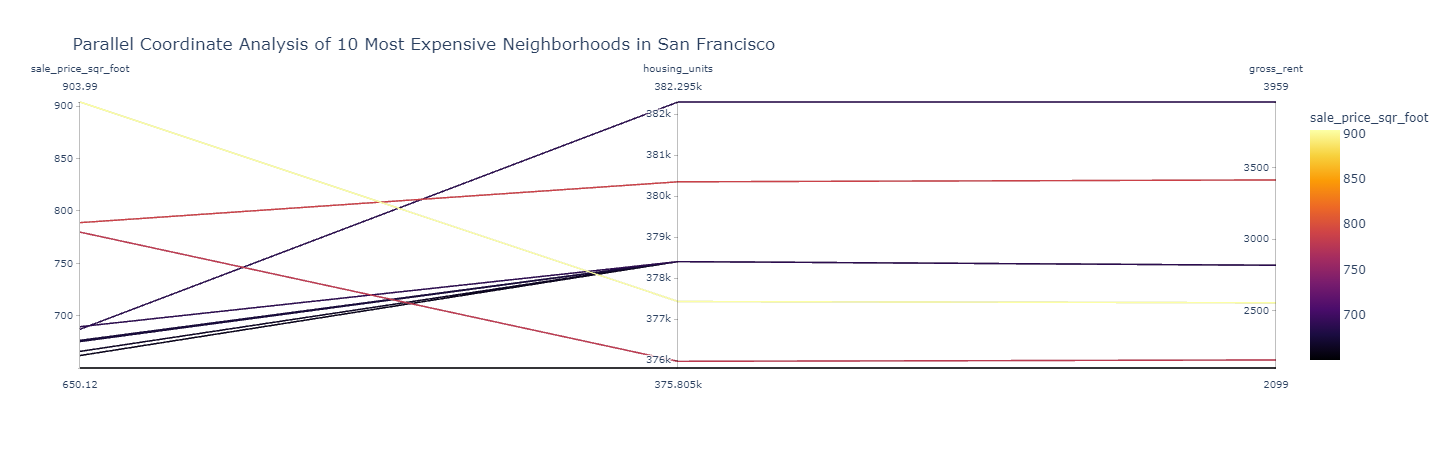

In [44]:
parallel_coordinates()

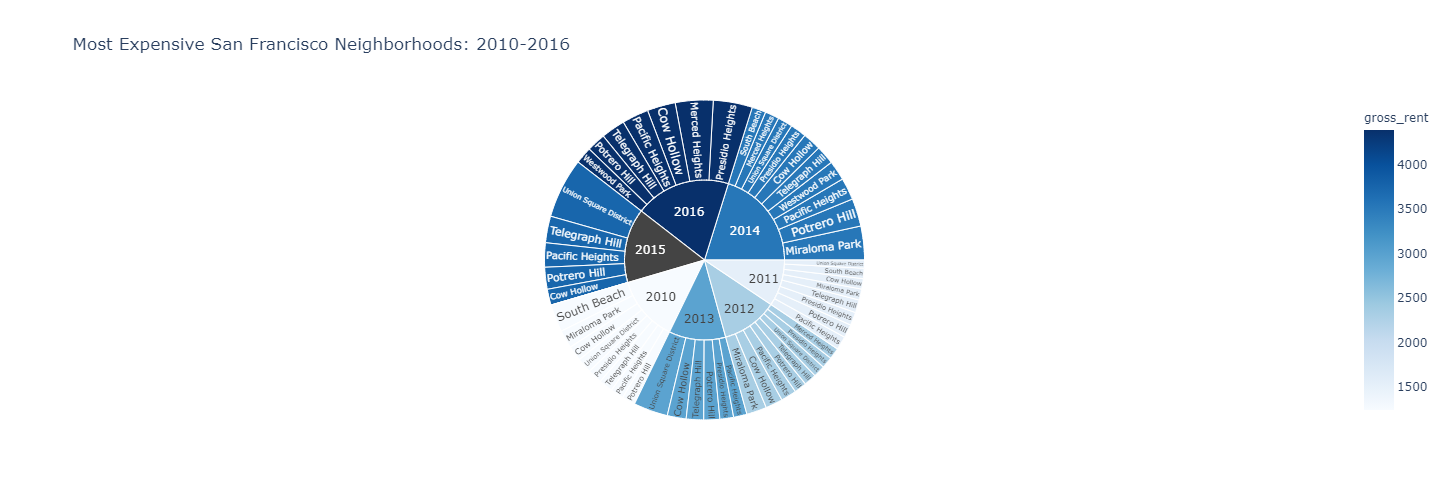

In [53]:
sunburst()